# Bar plot
> Vertical and horizontal bar plots

- toc: true 
- badges: true
- comments: false
- categories: [jupyter]

<img src="python_figures/bars.png" alt="bars" width="600">

## Introduction

This code produces the figure above. Here we showcase the use of unicode text.

## The code

In [2]:
from __future__ import unicode_literals
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from bidi import algorithm as bidialg      # needed for arabic, hebrew
import arabic_reshaper                     # needed for arabic

ModuleNotFoundError: No module named 'arabic_reshaper'

In [2]:
# http://wiki.scipy.org/Cookbook/Matplotlib/LaTeX_Examples
pts_per_inch = 72.27       # this is a latex constant, don't change it.
text_width_in_pts = 300.0  # write "\the\textwidth" (or "\showthe\columnwidth" for a 2 collumn text)
                           # inside a figure environment in latex, the result will be on the dvi/pdf next to the figure. See url above.
text_width_in_inches=text_width_in_pts/pts_per_inch
golden_ratio = 0.618     # make rectangles with a nice proportion
inverse_latex_scale = 2  # figure.png or figure.eps will be intentionally larger, because it is prettier
                         # when compiling latex code, use \includegraphics[scale=(1/inverse_latex_scale)]{figure}
fig_proportion = (3.0 / 3.0) # we want the figure to occupy 2/3 (for example) of the text width
csize = inverse_latex_scale * fig_proportion * text_width_in_inches
fig_size = (1 * csize, 1.3 * csize)  # always 1.0 on the first argument
text_size = inverse_latex_scale * 10  # find out the fontsize of your latex text, and put it here
label_size = inverse_latex_scale * 10
tick_size = inverse_latex_scale * 8
# learn how to configure:
# http://matplotlib.sourceforge.net/users/customizing.html
params = {'backend': 'ps',
          'axes.labelsize': 16,
          'legend.fontsize': 14,
          'legend.handlelength': 2.5,
          'legend.borderaxespad': 0,
          'axes.labelsize': label_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          # 'font.family': 'serif',
          'font.size': text_size,
          # 'font.serif': ['Computer Modern Roman'],
          'ps.usedistiller': 'xpdf',
          # 'text.usetex': True,
          'figure.figsize': fig_size,
          #'text.latex.unicode': True,
          }
plt.rcParams.update(params)

plt.ioff()
fig = plt.figure(1, figsize=fig_size)  # figsize accepts only inches.
fig.clf()

dpi = 100
pixel_size = (700,700)
fig_size = (pixel_size[0]/dpi,pixel_size[1]/dpi)
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
fig.subplots_adjust(left=0.30, right=0.97, top=0.95, bottom=0.06,
                    hspace=0.2, wspace=0.1)

In [3]:
words = [u'Fußball Ångström\nsøster Россия',
         u'français maître\nvoilà égoïste',
         u'España',
         u'İstanbul ağzı',
         u'Anything Unicode'
         ]
values1 = [2575, 5851, 3191, 2303, 3029]
values2 = [4813, 5219, 5505, 6229, 6961]
values1 = np.array(values1)
values2 = np.array(values2)
width = 0.35       # the width of the bars
r = np.arange(len(values1))

ax1 , horizontal bars

In [4]:
v1 = ax1.barh(r, values1, width, color='pink')
v2 = ax1.barh(r + width, values2, width, color='brown')
ax1.axis([0, 8600, r.min() - 0.3, r.max() + 1])
ax1.set_yticks(r)
ax1.set_yticks(r + 1 * width)
ax1.set_yticklabels(words)
xt = np.arange(0, 8100, 1000)
ax1.set_xticks(xt)
ax1.set_xticklabels(xt)
ax1.set_xlabel(u'the values', fontsize=16)
ax1.set_title(u'Title here', fontsize=18)
ax1.xaxis.grid(True)

ax1.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left='off',        # ticks along the left edge are off
    right='off',       # ticks along the right edge are off
    labelleft='on')    # labels along the bottom edge are on

ax1.legend((v1, v2),
          (u'2016', u'2015'),
          loc=(0.74,0.05))

def autolabel_hor(rects,ax, offset_x, offset_y):
    # attach some text labels at the tip of the bars
    for i,rect in enumerate(rects):
        width = rect.get_width()
        height = rect.get_height()
        ax.text(width + offset_x, rect.get_y() + offset_y * height,
                '%d' % int(width),
                ha='left', va='bottom', fontsize=14)
autolabel_hor(v1, ax1, 100.0, -0.20)
autolabel_hor(v2, ax1, 100.0, -0.10)

ax2, vertical bars

In [5]:
from bidi import algorithm as bidialg

w1 = ax2.bar(r, values1, width, color='pink')
w2 = ax2.bar(r + width, values2, width, color='brown')
ax2.axis([r.min() - 0.3, r.max() + 1, 0, 8600])
ax2.set_xticks(r)
ax2.set_xticks(r + 1 * width)
shalom = bidialg.get_display(u'שלום')
salam = bidialg.get_display(arabic_reshaper.reshape(u'سلام'))
ax2.set_xticklabels([shalom, salam, 'ccc', 'ddd', 'eee'])
xt = np.arange(0, 8200, 1000)
ax2.set_yticks(xt)
ax2.set_yticklabels(xt)
ax2.yaxis.grid(True)

ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top='off',         # ticks along the top edge are off
    bottom='off',      # ticks along the bottom edge are off
    labelbottom='on')  # labels along the bottom edge are on

ax2.legend((w1, w2),
          (u'2016', u'2015'),
          loc="upper center")

def autolabel_ver(rects,ax, offset_x, offset_y):
    # attach some text labels at the tip of the bars
    for i,rect in enumerate(rects):
        width = rect.get_width()
        height = rect.get_height()
        ax.text(rect.get_x() + offset_x * width, height + offset_y,
                '%d' % int(height),
                ha='left', va='bottom', fontsize=14)
autolabel_ver(w1, ax2, -0.3, 100.0)
autolabel_ver(w2, ax2, 0., 100.0)

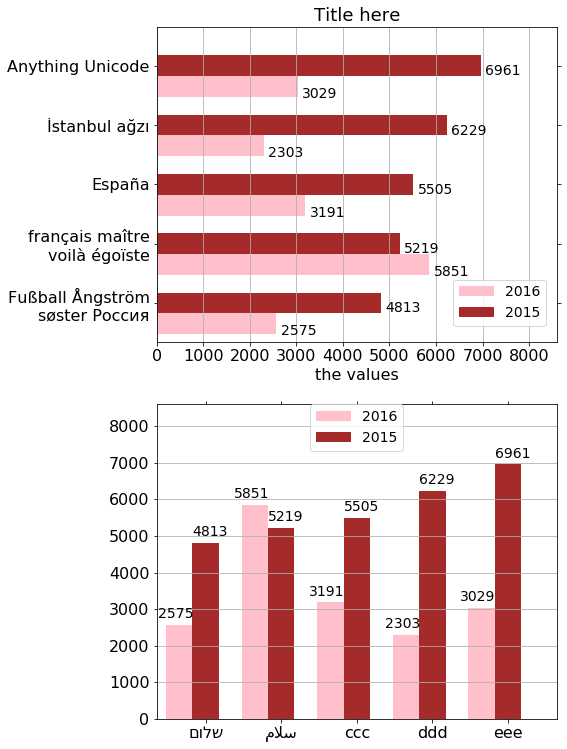

In [6]:
%matplotlib inline
fig.savefig("./python_figures/bars.png")
plt.show()
fig